# <font color ='blue'>Business Success - Working Copy
    
<img src="sba_logo.png" alt="SBA Logo" title="SBA Logo" width="300" height="100" align="right"/>
    
    
# <p style="font-size:50px" align="center">Business Success</p> <sub>By Kaniela Denis - ???</sub>

<hr style="border:2px solid blue"> </hr>

In [1]:
# import pandas and numpy to start coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# prep methods
from sklearn.model_selection import train_test_split

# Scaler
from sklearn.preprocessing import MinMaxScaler

# cluster method
from sklearn.cluster import KMeans

# Feature Engineering methods
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing

# Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

# <font color = 'red'> Planning

## Project Goals
- Using classification modeling, discover drivers of SBA loans that predict if a loan will default or not.

## Project Description
- Loans are keys to making dreams come true from buying a house to starting a business. Small business loans come with high risk and it is the goal of this projec to  create a classification model that can predict if a loan will default or nota.
- Referenced from https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied
- References https://www.tandfonline.com/doi/full/10.1080/10691898.2018.1434342

## Initial Questions
- Are there more defaulted loans?
- What term lengths are common for defaulted loans?
- What is the timeline of default loans vs non-default loans
- In what industries do loan defaults occur most?
- In what locations do loan defaults occur most

## Deliver
- GitHub Repo with Final Notebook and README
- Project Summary
- Requirements:
    - 3+ Stats Test
    - Answered 4 questions
    - Creaete 3 Models
    - Trello Board
    
    

## Data Dictionary

In [2]:
dd1 = pd.read_csv('dd1_27_vars.csv')
dd1

,Variable name,Data type,Description of variable,Additional Info
0,LoanNr_ChkDgt,Text,Identifier – Primary key,NaN
1,Name,Text,Borrower name,NaN
2,City,Text,Borrower city,NaN
3,State,Text,Borrower state,NaN
4,Zip,Text,Borrower zip code,NaN
5,Bank,Text,Bank name,NaN
6,BankState,Text,Bank state,NaN
7,NAICS,Text,North American industry classification system ...,NaN
8,ApprovalDate,Date/Time,Date SBA commitment issued,NaN
9,ApprovalFY,Text,Fiscal year of commitment,NaN


In [3]:
dd2 = pd.read_csv('dd2_8_add_vars.csv')
dd2

,Variable name,Data type,Description of variable
0,New,Number,"=1 if NewExist=2 (New Business), =0 if NewExis..."
1,Portion,Number,Proportion of gross amount guaranteed by SBA
2,RealEstate,Number,"=1 if loan is backed by real estate, =0 otherwise"
3,Recession,Number,"=1 if loan is active during Great Recession, =..."
4,Selected,Number,=1 if the data are selected as training data t...
5,Default,Number,"=1 if MIS_Status=CHGOFF, =0 if MIS_Status=PIF"
6,daysterm,Number,Extra variable generated when creating “Recess...
7,xx,Number,Extra variable generated when creating “Recess...


In [4]:
dd3 = pd.read_csv('dd3_naics.csv')
dd3

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31–33,Manufacturing
5,42,Wholesale trade
6,44–45,Retail trade
7,48–49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


# <font color = 'red'> Acquisition

## Get Data
- Pull from
- how
- things needed

In [5]:
df = pd.read_csv('SBAnational.csv')
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
df.shape

(899164, 27)

# <font color = 'red'> Prepare

## Rename Columns for Readability

In [7]:
# lowercase columns names
df.columns = df.columns.str.lower()
df.head()

,loannr_chkdgt,name,city,state,zip,bank,bankstate,naics,approvaldate,approvalfy,...,revlinecr,lowdoc,chgoffdate,disbursementdate,disbursementgross,balancegross,mis_status,chgoffpringr,grappv,sba_appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [8]:
# rename columns
df = df.rename(columns = {'loannr_chkdgt': 'loan_id',
 'bankstate':'bank_state',
 'approvaldate':'appv_date',
 'approvalfy': 'appv_fy',
    'noemp':'emp_num',
 'newexist': 'new_existing',
 'createjob': 'jobs_created',
 'retainedjob': 'jobs_retained',
 'franchisecode': 'franchise_code',
 'urbanrural': 'urban_rural',
 'revlinecr': 'rev_credit',
 'lowdoc': 'low_doc',
 'chgoffdate': 'default_date' ,
 'disbursementdate': 'disbursement_date',
 'disbursementgross': 'disbursement_gross',
 'balancegross': 'outstanding_gross',
 'mis_status': 'loan_status',
 'chgoffpringr': 'default_amount',
 'grappv': 'appv_loan_amount',
 'sba_appv': 'sba_appv_amount'})
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,rev_credit,low_doc,default_date,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## Investigate Columns

In [9]:
# show value counts for each column, does not include nulls
for col in df.columns:
    print(f'-------------{col}-----------------')
    print(df[df[col].notna()][col].value_counts(dropna=False))

-------------loan_id-----------------
4097835008    1
2458344004    1
4882494001    1
1323625010    1
8642743007    1
             ..
4245494009    1
6421664000    1
2336416006    1
2471824000    1
5406194009    1
Name: loan_id, Length: 899164, dtype: int64
-------------name-----------------
SUBWAY                           1269
QUIZNO'S SUBS                     433
COLD STONE CREAMERY               366
QUIZNO'S                          345
DOMINO'S PIZZA                    329
                                 ... 
K & T EXCAVATING INC                1
KENNETH R. THORELL, DDS             1
COASTAL DELIVERY & INSTALLATI       1
TIGER PACK, INC.                    1
DIAMONDS BY DESIGN                  1
Name: name, Length: 779583, dtype: int64
-------------city-----------------
LOS ANGELES        11558
HOUSTON            10247
NEW YORK            7846
CHICAGO             6036
MIAMI               5594
                   ...  
TWENTYNINE PALM        1
Presque Isle           1
PLUMAS LAKE  

In [10]:
df.shape

(899164, 27)

### Notes:
- LA and Houston have the most loans
- CA has the most loans
- Bank of America and Wells Fargo have the most loans
- naics code as zero. investigate 
- Continuos Columns: term, jobs_created, jobs_retained, dispursement_gross, outstanding_gross, default_amount, appv_loan_amount, sba_appv_amount 
- Categorical Columns: new_existing, urban_rural, loan_status, 
- Investigate Further: rev_credit, low_doc, 

In [11]:
# investiage naics code zero. Looks spread across locations
df[df.naics== 0].state.value_counts()

CA    28701
TX    17770
NY    11676
OH     7186
FL     6616
MO     6158
PA     6139
IL     5903
WA     5888
MN     5670
WI     5243
GA     5097
CO     4658
MA     4646
NJ     4325
IA     3944
MI     3670
KS     3608
AZ     3378
NC     3310
UT     3276
MT     2899
VA     2794
AL     2735
NH     2636
OK     2635
MD     2587
IN     2514
LA     2510
CT     2443
OR     2441
TN     2355
ID     2346
VT     2038
AR     1915
NV     1750
KY     1727
NM     1716
NE     1645
RI     1645
SD     1530
ND     1530
ME     1529
MS     1481
SC     1352
WV     1016
AK      952
WY      925
HI      705
DE      458
DC      271
Name: state, dtype: int64

In [12]:
# checking the rows with naics as zero show that maybe it isolated to older loans
df[df.naics== 0].appv_fy.value_counts().index

Index([ '1995',    1997,    1996,    1998,    2000,    1999,    1993,    1992,
          1994,    1991,    1990,    1989,  '1994',    1986,  '1996',    1984,
          1985,    1983,    1987,    1988,    1982,    1981,    1980,    1979,
          1978,  '1977',  '1978',  '1979',    2001,  '1976',    1973,    1974,
          1972,  '1981',  '1980', '1976A',    1975,  '1971',  '1982',  '1975',
          1976,    1977,  '1970',  '1983',  '1984',    2010,  '1974',  '1969',
          1971,    2009,    2007,    2003,    1965,  '1967',  '1968',    1968,
          1967,    1966,    1962],
      dtype='object')

### Notes:
- naics of 0 probably means that the collection was faulty earlier and got better over time. Not limited to location. Keeping column for now.

## Nulls

In [13]:
# check for nulls
df.isna().sum().sort_values(ascending=False)

default_date          736465
rev_credit              4528
low_doc                 2582
disbursement_date       2368
loan_status             1997
bank_state              1566
bank                    1559
new_existing             136
city                      30
state                     14
name                      14
loan_id                    0
appv_loan_amount           0
default_amount             0
outstanding_gross          0
disbursement_gross         0
jobs_created               0
urban_rural                0
franchise_code             0
jobs_retained              0
emp_num                    0
term                       0
appv_fy                    0
appv_date                  0
naics                      0
zip                        0
sba_appv_amount            0
dtype: int64

### Notes:
- default_date colum has too many nulls. Need to drop
- drop the rest

In [14]:
# drop column default_date
df = df.drop(columns='default_date')
df.columns

Index(['loan_id', 'name', 'city', 'state', 'zip', 'bank', 'bank_state',
       'naics', 'appv_date', 'appv_fy', 'term', 'emp_num', 'new_existing',
       'jobs_created', 'jobs_retained', 'franchise_code', 'urban_rural',
       'rev_credit', 'low_doc', 'disbursement_date', 'disbursement_gross',
       'outstanding_gross', 'loan_status', 'default_amount',
       'appv_loan_amount', 'sba_appv_amount'],
      dtype='object')

In [15]:
# drop the rest of the nulls
df = df.dropna()
df.shape

(886240, 26)

## Adjust Data Types

In [16]:
df.appv_loan_amount.str.replace('$','').str.replace(',','_')

0          60_000.00 
1          40_000.00 
2         287_000.00 
3          35_000.00 
4         229_000.00 
             ...     
899159     70_000.00 
899160     85_000.00 
899161    300_000.00 
899162     75_000.00 
899163     30_000.00 
Name: appv_loan_amount, Length: 886240, dtype: object

In [17]:
df.appv_loan_amount

0          $60,000.00 
1          $40,000.00 
2         $287,000.00 
3          $35,000.00 
4         $229,000.00 
              ...     
899159     $70,000.00 
899160     $85,000.00 
899161    $300,000.00 
899162     $75,000.00 
899163     $30,000.00 
Name: appv_loan_amount, Length: 886240, dtype: object

In [18]:
# select columns to change
cols = ['disbursement_gross','outstanding_gross','default_amount','appv_loan_amount','sba_appv_amount']

In [19]:
# remove $ and , from money columns
for col in cols:
    df[col] = df[col].str.replace('$','').str.replace(',','_')

In [20]:
df.appv_loan_amount

0          60_000.00 
1          40_000.00 
2         287_000.00 
3          35_000.00 
4         229_000.00 
             ...     
899159     70_000.00 
899160     85_000.00 
899161    300_000.00 
899162     75_000.00 
899163     30_000.00 
Name: appv_loan_amount, Length: 886240, dtype: object

In [21]:
# replace 1976A to 1976 to enable datetime converstion
df.appv_fy = df.appv_fy.replace({'1976A':'1976'})

In [22]:
# confirm change
df[df.appv_fy == '1976A']

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,urban_rural,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount


In [23]:
# change dtypes for date columns and money columns
df = df.astype({'appv_date':'datetime64',
          'appv_fy':'datetime64',
          'disbursement_date':'datetime64',
          'disbursement_gross': float,
          'outstanding_gross': float,
           'default_amount': float,
           'appv_loan_amount': float,
           'sba_appv_amount': float})
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,urban_rural,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [24]:
df.dtypes

loan_id                        int64
name                          object
city                          object
state                         object
zip                            int64
bank                          object
bank_state                    object
naics                          int64
appv_date             datetime64[ns]
appv_fy               datetime64[ns]
term                           int64
emp_num                        int64
new_existing                 float64
jobs_created                   int64
jobs_retained                  int64
franchise_code                 int64
urban_rural                    int64
rev_credit                    object
low_doc                       object
disbursement_date     datetime64[ns]
disbursement_gross           float64
outstanding_gross            float64
loan_status                   object
default_amount               float64
appv_loan_amount             float64
sba_appv_amount              float64
dtype: object

In [25]:
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,urban_rural,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


## Adjust Column Values for Readability and Analysis

### Change Loan Status Columsn Values to default or paid

In [26]:
df.loan_status.unique()

array(['P I F', 'CHGOFF'], dtype=object)

In [27]:
# change loan_status values from PIF to paid and CHGOFF to default for readability
df.loan_status = df.loan_status.map({'P I F':'paid','CHGOFF':'default'})

In [28]:
df.loan_status.unique()

array(['paid', 'default'], dtype=object)

### Change Disbursement Date, Approval Date Columns Values to below 2020 to remove outliers for better analyisis

In [29]:
# remove outlier from column disbursement_date for better analysis
df = df[df.disbursement_date < '2020']

In [30]:
# remove outlier from column appv_date for better analysis
df = df[df.appv_date < '2020']

In [31]:
df.shape

(886199, 26)

## Outliers

In [32]:
df.columns.to_list()

['loan_id',
 'name',
 'city',
 'state',
 'zip',
 'bank',
 'bank_state',
 'naics',
 'appv_date',
 'appv_fy',
 'term',
 'emp_num',
 'new_existing',
 'jobs_created',
 'jobs_retained',
 'franchise_code',
 'urban_rural',
 'rev_credit',
 'low_doc',
 'disbursement_date',
 'disbursement_gross',
 'outstanding_gross',
 'loan_status',
 'default_amount',
 'appv_loan_amount',
 'sba_appv_amount']

In [33]:
# Create list of columns to investigate/viz
cols = ['emp_num',
        'jobs_created',
        'jobs_retained',
        'disbursement_gross',
        'appv_loan_amount',
        'sba_appv_amount',
        'term'
       ]

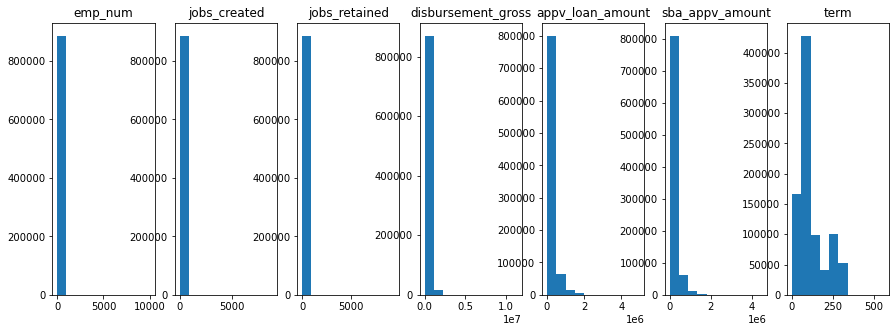

In [34]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(cols,1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist()

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    #plt.ticklabel_format(useOffset=False)
    
plt.show()

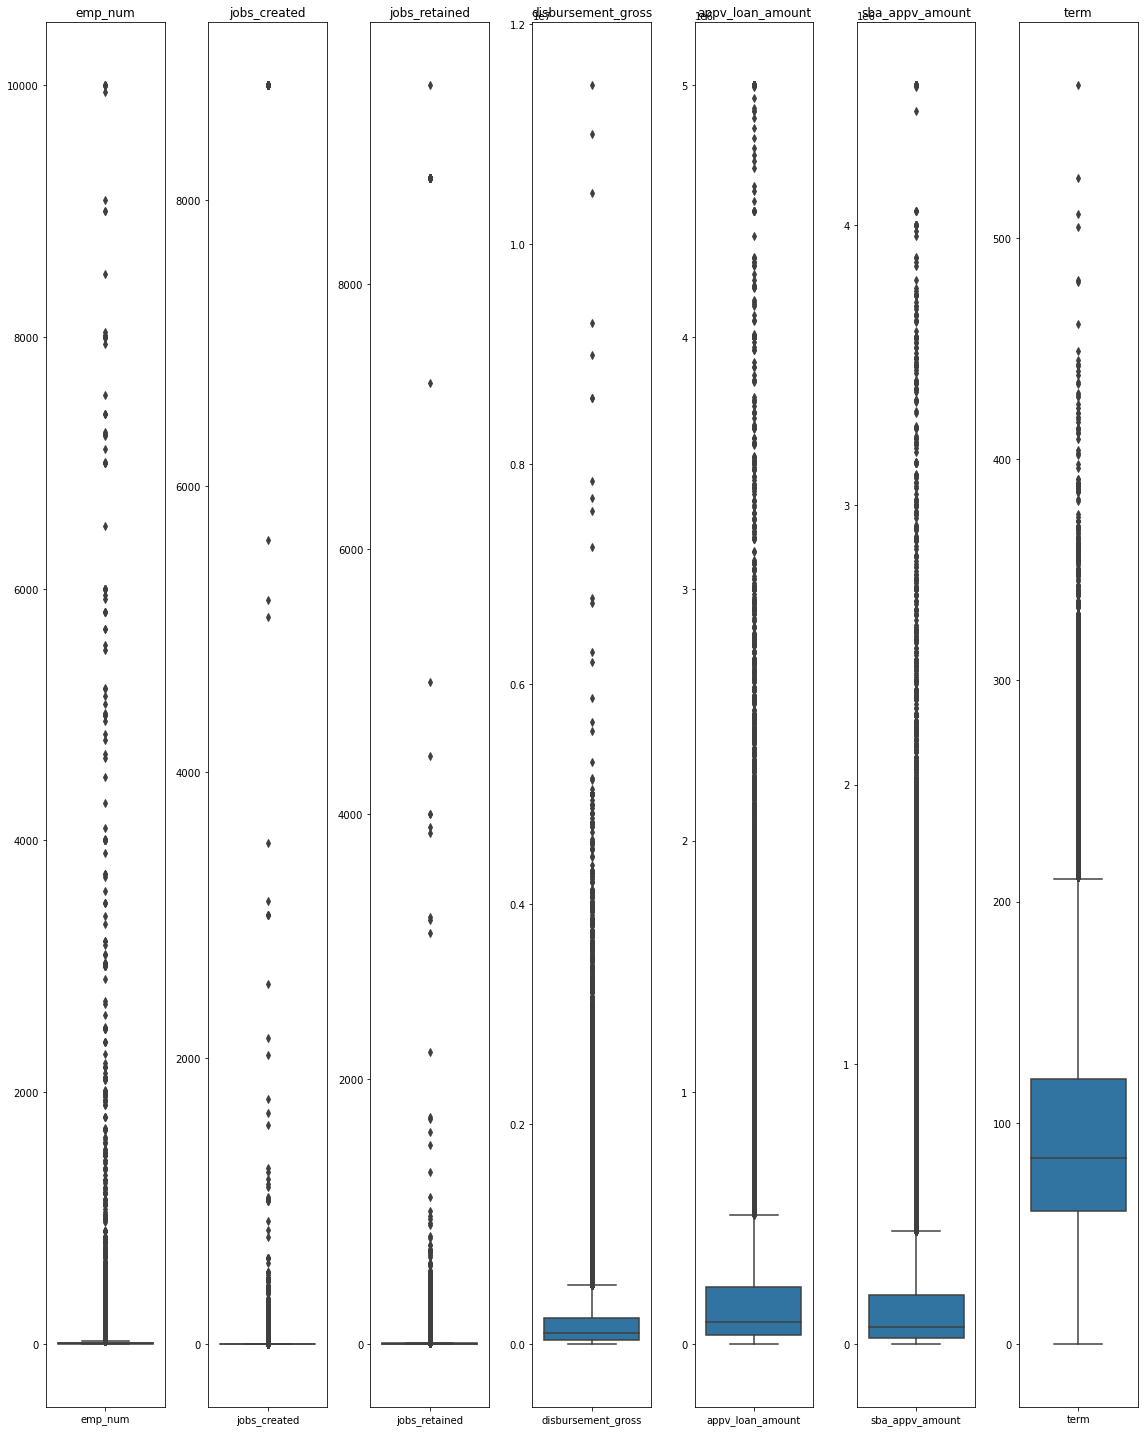

In [35]:
# List of columns
        
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)
    
    # sets proper spacing between plots
    plt.tight_layout()

plt.show()

In [36]:
df.shape

(886199, 26)

In [37]:
# remove outliers from each column in cols_list
for col in cols:

    q1, q3 = df[col].quantile([.25, .75])  # get quartiles

    iqr = q3 - q1   # calculate interquartile range

    upper_bound = q3 + 2 * iqr   # get upper bound
    lower_bound = q1 - 2 * iqr   # get lower bound

    # return dataframe without outliers

    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [38]:
df.shape

(477226, 26)

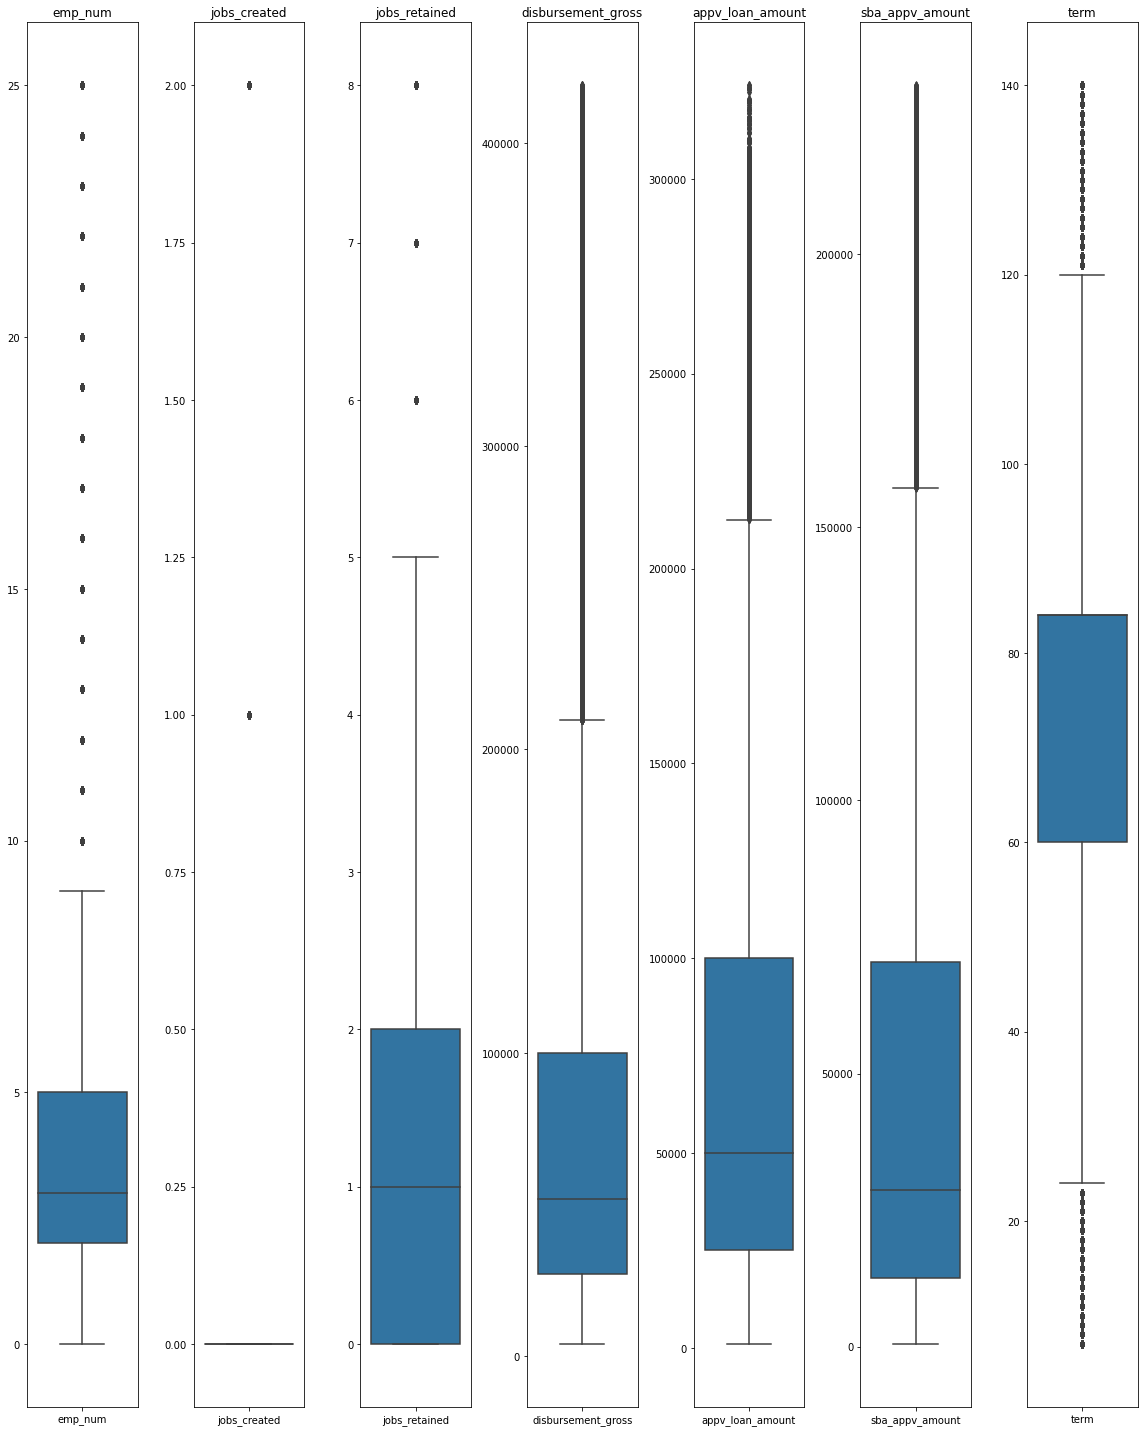

In [39]:
# List of columns
        
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)
    
    # sets proper spacing between plots
    plt.tight_layout()



## Unexplored Feature Engineering

In [40]:
# add ratio column for sba approved amount over bank approved amount
df['sba_percent'] = df.sba_appv_amount / df.appv_loan_amount

In [41]:
# add ratio column for debt oustanding to original debt
df['outstanding_debt_percent'] = (df.outstanding_gross / df.appv_loan_amount)

In [42]:
# add ratio column for appv_loan_amount by term 'monthly_debt'
df['monthly_debt'] = round((df.appv_loan_amount / df.term), 2)

In [43]:
# create column for jobs count by adding job created and jobs retained
df['jobs_count'] = (df.jobs_created + df.jobs_retained)

In [44]:
df['is_default'] = df.loan_status.map({'default':1, 'paid':0})

In [45]:
df.shape

(477226, 31)

# <font color = 'red'> Explore

## Split

In [46]:
# split data set. This function splits the telco data into the train, validate, and test samples at portions: train= 56%, validate= 24%, test = 20%
train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.loan_status)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.loan_status)
train.shape, validate.shape, test.shape

((267246, 31), (114534, 31), (95446, 31))

In [47]:
train.columns.to_list()

['loan_id',
 'name',
 'city',
 'state',
 'zip',
 'bank',
 'bank_state',
 'naics',
 'appv_date',
 'appv_fy',
 'term',
 'emp_num',
 'new_existing',
 'jobs_created',
 'jobs_retained',
 'franchise_code',
 'urban_rural',
 'rev_credit',
 'low_doc',
 'disbursement_date',
 'disbursement_gross',
 'outstanding_gross',
 'loan_status',
 'default_amount',
 'appv_loan_amount',
 'sba_appv_amount',
 'sba_percent',
 'outstanding_debt_percent',
 'monthly_debt',
 'jobs_count',
 'is_default']

## Multi-Variate Exploration
### Features to Explore First
- appv_loan_amount
- sba_appv_amount
- monthly_debt
- outstanding_debt_percent
- sba_percent
- new_existing
- naics
- emp_num
- jobs_count

### Initial Questions to Ask
- Are there more defaulted loans?
- What term lengths are common for defaulted loans?
- What is the timeline of default loans vs non-default loans
- In what industries do loan defaults occur most?
- In what locations do loan defaults occur most

### Question 1: Are there more defaulted loans than paid loans?

In [48]:
train[train.loan_status=='default'].shape[0], train[train.loan_status=='paid'].shape[0]

(55275, 211971)

### Notes:
- There are mode paid-off loans then defaulted loans

### Question 2: What term lengths are common for defaulted loans?

Text(0.5, 1.0, 'Loan by Term in Months')

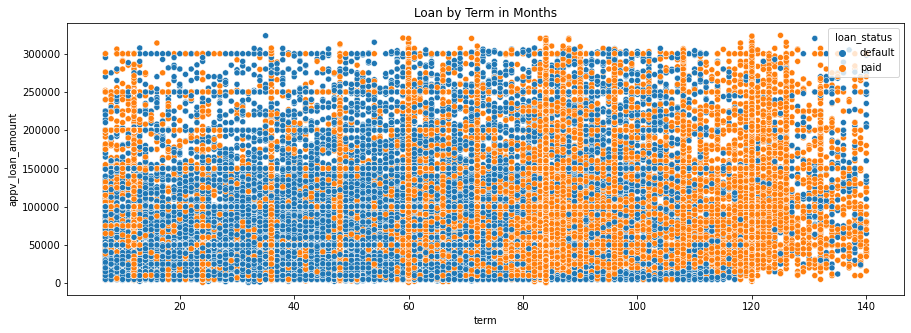

In [49]:
# viz loan amount by term hue by loan status
plt.figure(figsize=(15,5))
sns.scatterplot(data=train, x='term', y='appv_loan_amount', hue='loan_status')
plt.title('Loan by Term in Months')

### Notes:
- Most loans are below 300K amount and 140 month term
- Defaults seem to appear most under 80 month term
- Test with Stats that 

### Question 3: What is the timeline of default loans vs non-default loans?

Text(0.5, 1.0, 'Loans Overtime by Staus')

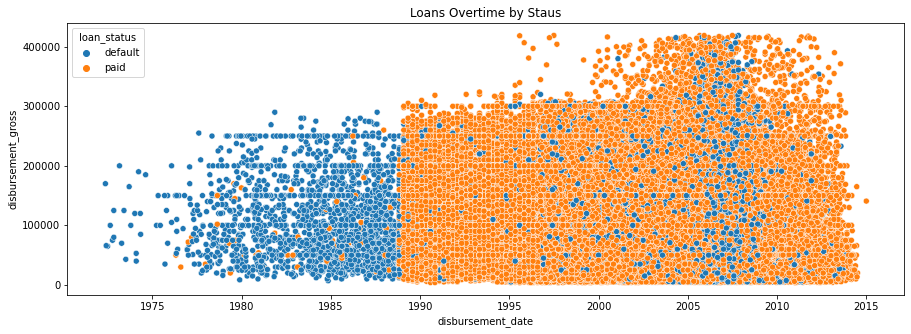

In [50]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train, x='disbursement_date', y='disbursement_gross', hue='loan_status')
plt.title('Loans Overtime by Staus')

### Notes:
- majorithy of loan defaults occured for loans disbursed prior to 1990. linked to 1991 recession where GDP growth was -2.9%.
- loan defaults spiked again around the 2009 recession when GDP growth was -2.6%. 

### Question 3A: What is the loan approval timeline for loans that defaulted?

Text(0.5, 1.0, 'Loans Overtime by Staus')

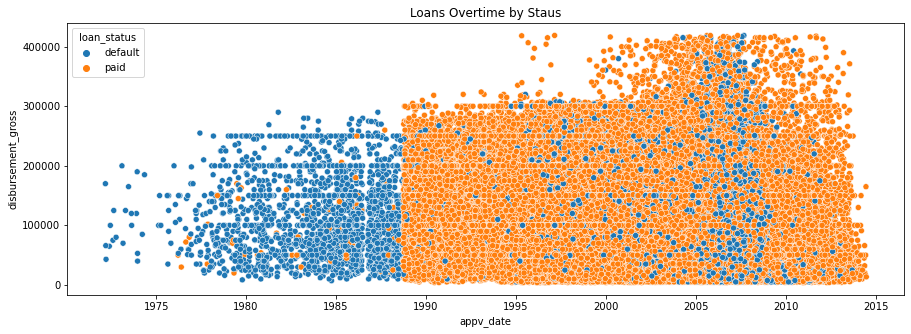

In [51]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train, x='appv_date', y='disbursement_gross', hue='loan_status')
plt.title('Loans Overtime by Staus')

### Notes:
- No significant changes between appv_date and disbursement_date

### Question 4: In what industries do loan defaults occur most?

In [52]:
# create dataframe that groups by naics and loan status then counts each loan
naics_df = pd.DataFrame(train.groupby(['naics','loan_status']).loan_id.count()).reset_index()
naics_df.head()

,naics,loan_status,loan_id
0,0,default,5157
1,0,paid,47808
2,111110,paid,8
3,111120,paid,2
4,111140,default,1


In [53]:
# filter dataframe to remove naics 0 and include counts > 500
naics_df = naics_df[(naics_df.naics > 0) & (naics_df.loan_id > 500) & (naics_df.loan_status == 'default')].sort_values('loan_id', ascending=False)

Text(0.5, 0, 'NAICS Code')

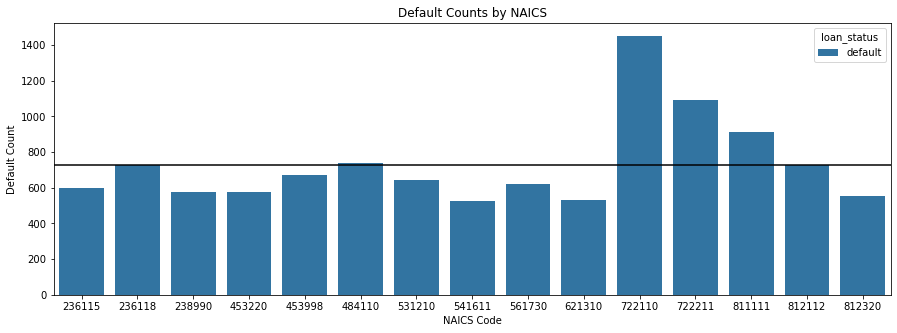

In [54]:
# plot default count by naics
plt.figure(figsize=(15,5))
sns.barplot(data=naics_df, x='naics', y='loan_id', hue='loan_status')
plt.axhline(y=naics_df.loan_id.mean(), color='black', label='Avg Count')
plt.title('Default Counts by NAICS')
plt.ylabel('Default Count')
plt.xlabel('NAICS Code')

### Notes:
- Top 3 NAICS that have highest count of defaults are 722110, 722211, and 811111
- NAICS 722110: Full Service Restaurant ref(https://www.census.gov/prod/ec02/parts/ec0272i02ab.pdf)
- NAICS 722211: Limit Service Restaurant ref(https://www.census.gov/prod/ec02/parts/ec0272i02ab.pdf)
- NAICS 811111: General Automotive Repaire ref(https://www.naics.com/naics-code-description/?code=811111)
- These three sectors are above ovarall mean. 
- Test with Stats

### Question 5: In what locations do loan defaults occur most?

In [55]:
# plot default count by state
default_df = train[train.loan_status=='default']
default_state = pd.DataFrame(default_df.groupby('state').loan_status.count()).reset_index().rename(columns={'loan_status':'default_count'}).sort_values('default_count', ascending=False)
default_state.head()

,state,default_count
4,CA,8792
34,NY,4346
43,TX,4302
9,FL,4103
14,IL,2430


Text(0.5, 0, 'State')

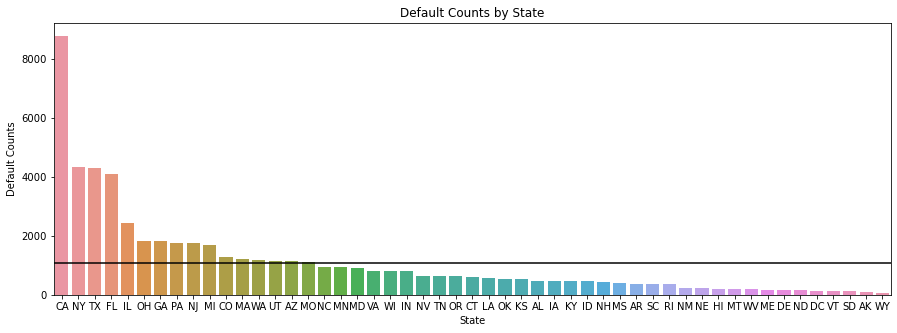

In [56]:
# plot defaults by state
plt.figure(figsize=(15,5))
sns.barplot(data=default_state, x='state', y='default_count')
plt.axhline(y=default_state.default_count.mean(), color='black', label='Avg Count')
plt.title('Default Counts by State')
plt.ylabel('Default Counts')
plt.xlabel('State')

### Notes:
- CA has the most, it almost doubles the next largest count of NY
- 14 state are above average default: CA, NY, TX, FL, IL, GA, OH, PA, NJ, MI, CO, WA, UT, MA
- Test with Stats

### Question 5A: What are the defaults by State for loans dispursed after 1990

In [57]:
# create df for disbursement date > 1990
train_1990 = train[train.disbursement_date > '1990']
train_1990 = pd.DataFrame(train_1990.groupby('state').loan_status.count()).reset_index().rename(columns={'loan_status':'default_count'}).sort_values('default_count', ascending=False)
train_1990.head()

,state,default_count
4,CA,32055
34,NY,19640
43,TX,19588
9,FL,12543
38,PA,11736


Text(0.5, 0, 'State')

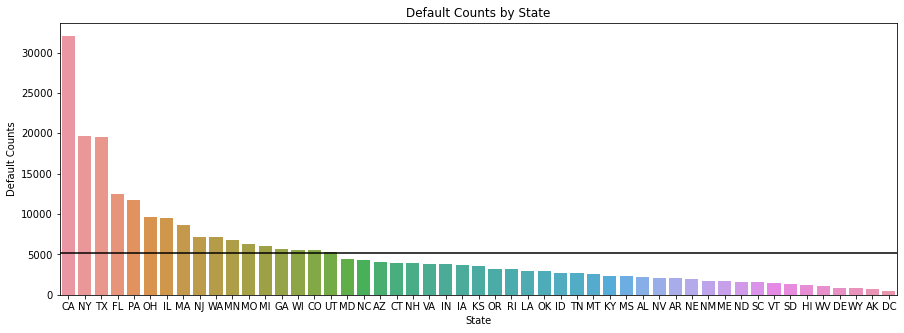

In [58]:
# plot defaults by state for loans approved after 1990
plt.figure(figsize=(15,5))
sns.barplot(data=train_1990, x='state', y='default_count')
plt.axhline(y=train_1990.default_count.mean(), color='black', label='Avg Count')
plt.title('Default Counts by State')
plt.ylabel('Default Counts')
plt.xlabel('State')

### Notes:
- CA has the most defaults.
- 17 States with default count higher than the overall average: CA, NY, TX, FL, PA, OH, IL, MA, WA, NJ, MN, MO, MI, GA, WI, CO, UT. Higher count than previous. Top 4 are the same.
- Test with Stats

### Question 6: Are there more defaults for business with less employess and less jobs?

Text(0.5, 0, 'Employee Number')

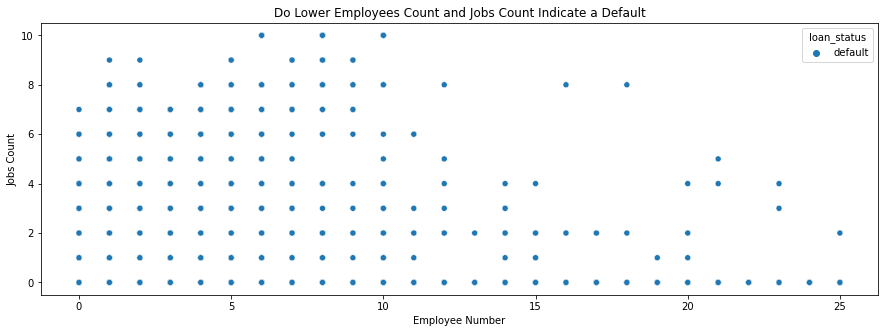

In [59]:
# plot defaults by emp_num and jobs_count
plt.figure(figsize=(15,5))
sns.scatterplot(data=default_df, x='emp_num', y='jobs_count', hue='loan_status')
plt.title('Do Lower Employees Count and Jobs Count Indicate a Default')
plt.ylabel('Jobs Count')
plt.xlabel('Employee Number')

### Notes:
- More defaults occur for low employee number. 
- More defaults occur with low jobs count and with high employee number. More employees with less jobs.
- Stats Test with Chi2 if Emp Num and Jobs Count are independent. I think they are not independent

### Question 7: Are there more defaults for loans with higher monhtly debt percent and higher outstanding debt percent?

Text(0.5, 0, 'SBA Covered Percent')

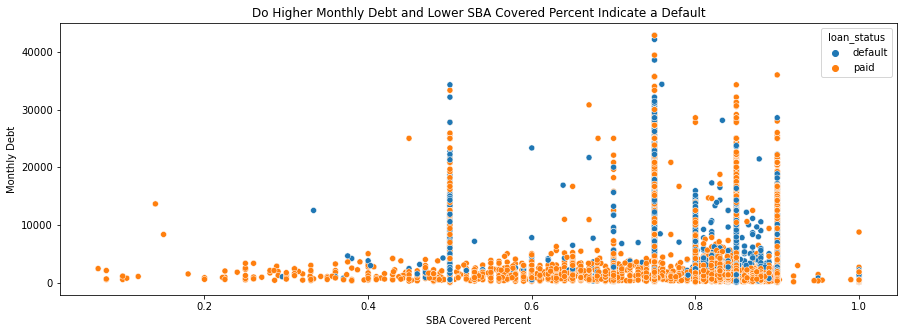

In [60]:
# plot defaults for monthly debt by sba_percent
plt.figure(figsize=(15,5))
sns.scatterplot(data=train, x='sba_percent', y='monthly_debt', hue='loan_status')
plt.title('Do Higher Monthly Debt and Lower SBA Covered Percent Indicate a Default')
plt.ylabel('Monthly Debt')
plt.xlabel('SBA Covered Percent')

Text(0.5, 0, 'SBA Covered Percent')

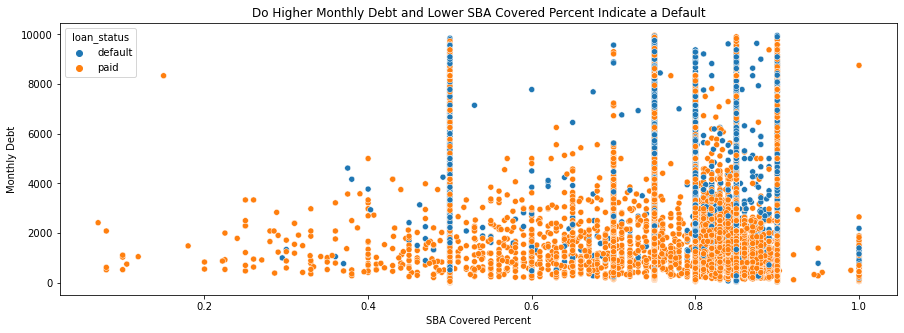

In [61]:
mo_debt_10k = train[train.monthly_debt < 10000]

plt.figure(figsize=(15,5))
sns.scatterplot(data=mo_debt_10k, x='sba_percent', y='monthly_debt', hue='loan_status')
plt.title('Do Higher Monthly Debt and Lower SBA Covered Percent Indicate a Default')
plt.ylabel('Monthly Debt')
plt.xlabel('SBA Covered Percent')

In [62]:
sba_p = train[['sba_appv_amount','appv_loan_amount', 'loan_status']]
sba_p['sba_percent'] = sba_p.sba_appv_amount / sba_p.appv_loan_amount
sba_p

,sba_appv_amount,appv_loan_amount,loan_status,sba_percent
710802,5000.0,10000.0,default,0.50
396998,112500.0,150000.0,default,0.75
72494,48000.0,60000.0,paid,0.80
133822,25000.0,50000.0,paid,0.50
848248,25000.0,50000.0,paid,0.50
...,...,...,...,...
847390,39200.0,49000.0,paid,0.80
235849,36100.0,72200.0,default,0.50
350255,19800.0,22000.0,paid,0.90
396838,112500.0,150000.0,paid,0.75


### Notes:
- Majority of defaults occur with higher than 3K monthly debt
- SBA Covered Percent doesn't show anything
- Stats Test if defaults are higher with monthly debt over 3000

## Stats Test
1. Question 2: Test if loans with term > 80 months had more defautls than otherwise
2. Question 4: Test if top 4 naics have more defaults than overall average
3. Question 5: Test if NY has more defaults than TX
4. Question 6: Test if loans with with lower jobs count have more defaults than overal average

### Stats Test 1: Question 2 - Are defaults of loans with term < 80 months Independent of  defaults of loans with term >= 80 months
- H0: Loans with term >= 80 months have the same distribution of defaults as loans with term < 80m months
- HA: Loans with term < 80 months have default distribution that are Independent of defaults of loans with term >= 80 months 

In [63]:
# create new df for subgroups for loan with term < 80 mo and > 80 mo
term_less_80 = train[['term','loan_status']]
term_less_80.head()

,term,loan_status
710802,39,default
396998,11,default
72494,60,paid
133822,84,paid
848248,72,paid


In [64]:
# set column for subgroup that is >= 80 mo term and default
term_less_80['term_group'] = np.where(term_less_80.term < 80, 'less_80', 'more_80')
term_less_80

,term,loan_status,term_group
710802,39,default,less_80
396998,11,default,less_80
72494,60,paid,less_80
133822,84,paid,more_80
848248,72,paid,less_80
...,...,...,...
847390,84,paid,more_80
235849,139,default,more_80
350255,84,paid,more_80
396838,84,paid,more_80


In [65]:
# set observed crosstab for subgropus with less or more than 80 mo term
observed = pd.crosstab(term_less_80.term_group, term_less_80.loan_status)
observed

loan_status,default,paid
term_group,,
less_80,49602,74399
more_80,5673,137572


In [66]:
# run chi2 test to compare subgroups
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 49602  74399]
 [  5673 137572]]
---
Expected

[[ 25647.3633843  98353.6366157]
 [ 29627.6366157 113617.3633843]]
---

chi^2 = 52624.1175
p     = 0.0000


### Notes:
- p-value is 0 so reject the null hypothesis, loans of < 80 mo term are Independent

### Stats Test 2: From Question 4: Are the default disribution of NAICS 722110, 722211, and 811111 Independent of each other? 
- HO: Defaults of Top 3 NAIC are Not-Indepdent of each other
- HA: Defaults of Top 3 NAICS are Independet of each other

In [67]:
# create new df subgroup column
naics_test = train[['loan_status', 'naics']]
naics_test = naics_test[(naics_test.naics==722110) | (naics_test.naics==722211) | (naics_test.naics==811111)]
naics_test

,loan_status,naics
667721,default,811111
379314,paid,722110
454771,paid,722110
523145,paid,722211
175062,default,722211
...,...,...
413097,default,722110
726820,paid,722110
281654,paid,811111
329158,paid,722110


In [68]:
# set observed crosstab for subgropus with less or more than 80 mo term
observed = pd.crosstab(naics_test.naics, naics_test.loan_status)
observed

loan_status,default,paid
naics,,
722110,1451,3788
722211,1093,3066
811111,912,3575


In [69]:
# run chi2 test to compare subgroups
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1451 3788]
 [1093 3066]
 [ 912 3575]]
---
Expected

[[1303.99596687 3935.00403313]
 [1035.182139   3123.817861  ]
 [1116.82189413 3370.17810587]]
---

chi^2 = 76.3752
p     = 0.0000


### Notes:
- P=0, Fail to reject null hypothesis. Defaults of Top 3 NAICS are Independent of each other'

### Stats Test 3: From Question 5: Are the defaults of New York Loans Indpendent from Defaults of Texas Loans
- H0: NY loan defaults are Not-Independent of TX loan defaults
- HA: NY loan defaults are Independent of TX loan defaults

In [70]:
# create new df with subgroup column
state_test = train[['loan_status', 'state']]
state_test = state_test[(state_test.state == 'TX') | (state_test.state == 'NY')]
state_test

,loan_status,state
396998,default,NY
72494,paid,TX
319323,paid,TX
856820,paid,TX
523145,paid,NY
...,...,...
496005,paid,TX
528449,paid,TX
694681,paid,TX
429159,paid,TX


In [71]:
# set observed crosstab for subgropus with less or more than 80 mo term
observed = pd.crosstab(state_test.state, state_test.loan_status)
observed

loan_status,default,paid
state,,
NY,4346,15593
TX,4302,15820


In [72]:
# run chi2 test to compare subgroups
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 4346 15593]
 [ 4302 15820]]
---
Expected

[[ 4304.24782207 15634.75217793]
 [ 4343.75217793 15778.24782207]]
---

chi^2 = 1.0038
p     = 0.3164


### Notes:
- p=.13, higher than .05, fail to reget null hypothesis. NY loan defaults are Not-Independent of TX loan defaults

### Stats Test 4: From Question 6: Are defaults from loans with lower employee number Independent from loans with high employee numbers. Low <= 10.
- H0: Defaults from loans with lower employee number are Not-Independent from loans with higher employee numbers
- HA: Defaults from loans with lower employee number are Independent from loans with higher employee numbers

In [73]:
# create new df with subgroup column
emp_test = train[['loan_status', 'emp_num']]
emp_test['emp_num_group'] = np.where(emp_test.emp_num <= 10, 'low','high') 
emp_test

,loan_status,emp_num,emp_num_group
710802,default,2,low
396998,default,1,low
72494,paid,3,low
133822,paid,2,low
848248,paid,1,low
...,...,...,...
847390,paid,1,low
235849,default,6,low
350255,paid,1,low
396838,paid,8,low


In [74]:
# set observed crosstab for subgropus with <= 10 employees
observed = pd.crosstab(emp_test.emp_num_group, emp_test.loan_status)
observed

loan_status,default,paid
emp_num_group,,
high,1962,17469
low,53313,194502


In [75]:
# run chi2 test to compare subgroups
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[  1962  17469]
 [ 53313 194502]]
---
Expected

[[  4018.95079814  15412.04920186]
 [ 51256.04920186 196558.95079814]]
---

chi^2 = 1430.6795
p     = 0.0000


### Notes:
- p=0, Reject Null Hypothesis. Defaults from loans with lower employee number are Independent from loans with higher employee numbers

## Explored Feature Engineering (skip)

# <font color = 'red'> Pre-Processing

## Select Columns for Scaling and Modeling

In [76]:
# Select columns to scale for feature selection and modeling
cols = [
 'disbursement_gross',
 'outstanding_gross',
 'default_amount',
 'appv_loan_amount',
 'sba_appv_amount',
 'sba_percent',
 'outstanding_debt_percent',
 'monthly_debt'
]

## Adjust Columns for Scaling (Not Needed)

## Create y_train and X_train sets

In [77]:
# establish target column
target = 'loan_status'

# create X & y version of train, validate, test with y the target and X are the features. 
X_train = train[cols].drop(columns=[target])
y_train = train[[target]]

X_validate = validate[cols].drop(columns=[target])
y_validate = validate[[target]]

X_test = test[cols].drop(columns=[target])
y_test = test[[target]]

KeyError: "['loan_status'] not found in axis"

## Scale for Feature Selection (Scaling not needed for Classification Modeling)
- Feature Selection Used for Clustering

## Feature Selection

## Clustering

## Explore Clustering

# <font color = 'red'> Modeling

## Model 0: Baseline

## Model 1: Decision Tree

## Model 2: Random Forest

## Model 3: K_Nearest Neighbor

## Evaluate Models

# <font color = 'red'> Delivery

## Conclusion
### Summary
- ??

### Recommendation
- ???

### Next Step
- ???
